## **Assignment 3 : To Apply the Fourier Transformation on given images.**

In [1]:
#Importing required libraries

import cv2 
import numpy as np 
from PIL import Image 
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

# **Applying Fourier Transform on Image.**

In [6]:
#opening image
origFotu = cv2.imread("color.png",0)

In [8]:
# OpenCV provides the functions cv2.dft(). It returns the frequency transform  which is a 2D complex array with two channels.
# First channel will have the real part of the result and second channel will have the imaginary part of the result.

dft_output = cv2.dft(np.float32(origFotu) , flags = cv2.DFT_COMPLEX_OUTPUT )

# Now once we got the result, zero frequency component (DC component) will be at top left corner. 
# To bring it to center, we need to shift the result by N/2 in both the directions. 
# This is simply done by the function, np.fft.fftshift().

dft_shift = np.fft.fftshift(dft_output)

# Calculate magnitude spectrum.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

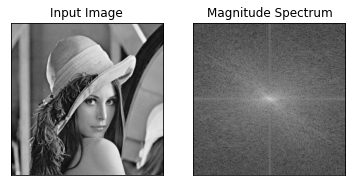

In [9]:
plt.subplot(121),plt.imshow(origFotu, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## This is Fourier tranform for colored images.

## Circular High Pass Filter (HPF) mask on Image.

Circular HPF mask = centre circle is 0 , remaining all ones.

Can be used for **Edge Detection** because low frequencies at center are blocked and only high frequencies are allowed.

Edges are high frequencies components and  It amplifies noise

In [10]:
rows, cols = origFotu.shape
center_row, center_column = int(rows/2) , int(cols/2)
mask = np.ones((rows,cols,2),np.uint8) # Two channels to match dft array dimensions.
radius = 40
center = [center_row, center_column]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= radius*radius
mask[mask_area] = 0


In [11]:
# Apply mask and inverse DFT : Multiply fourier transformed image(values) with the mask values.
fshift = dft_shift * mask

# Get the magnitude spectrum (only for plotting purposes).
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

# Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

# Inverse DFT to convert back to image domain from the frequency domain - will be complex numbers.
img_back = cv2.idft(f_ishift)

# Magnitude spectrum of the image domain.
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


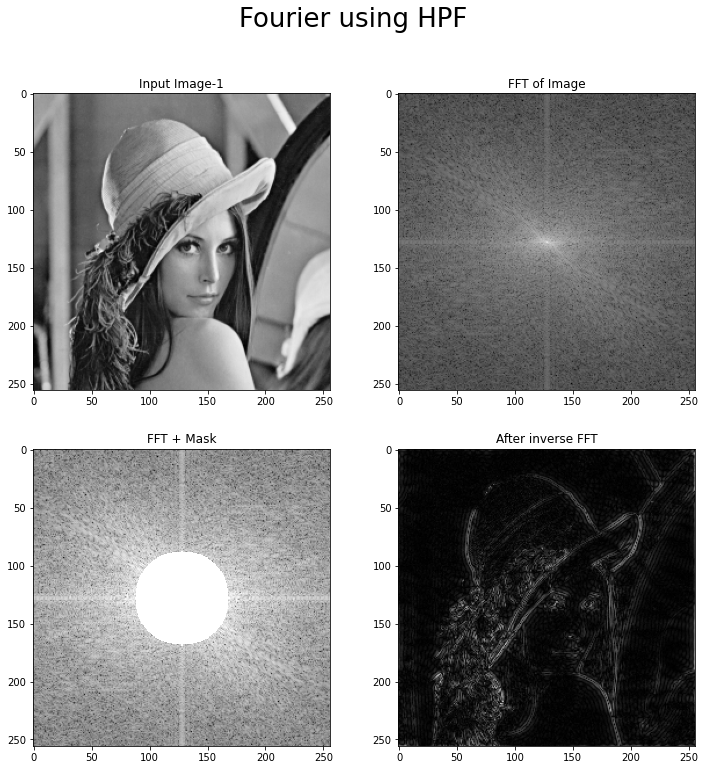

In [13]:
# Printing results.
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(origFotu, cmap = 'gray')
ax1.title.set_text('Input Image-1')
ax1 = fig.add_subplot(2,2,2)
ax1.imshow(magnitude_spectrum, cmap = 'gray')
ax1.title.set_text('FFT of Image')
ax1 = fig.add_subplot(2,2,3)
ax1.imshow(fshift_mask_mag, cmap = 'gray')
ax1.title.set_text('FFT + Mask')
ax1 = fig.add_subplot(2,2,4)
ax1.imshow(img_back, cmap = 'gray')
ax1.title.set_text('After inverse FFT')
fig.suptitle('Fourier using HPF',fontsize=26)
plt.show()

## Circular Low Pass Filter (LPF) mask on Image.
Circular LPF mask = centre circle is 1 , remaining all zeroes.

High frequencies are blocked and only low frequencies are allowed.

Smooth regions and **blur edges**.

It smooth out noise.

In [14]:
rows, cols = origFotu.shape
center_row, center_column = int(rows/2) , int(cols/2)
mask = np.zeros((rows,cols,2),np.uint8)
radius = 60
center = [center_row, center_column]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= radius*radius
mask[mask_area] = 1


In [15]:
# Apply mask and inverse DFT : Multiply fourier transformed image(values) with the mask values.
fshift = dft_shift * mask

# Get the magnitude spectrum (only for plotting purposes).
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

# Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

# Inverse DFT to convert back to image domain from the frequency domain - will be complex numbers.
img_back = cv2.idft(f_ishift)

# Magnitude spectrum of the image domain.
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


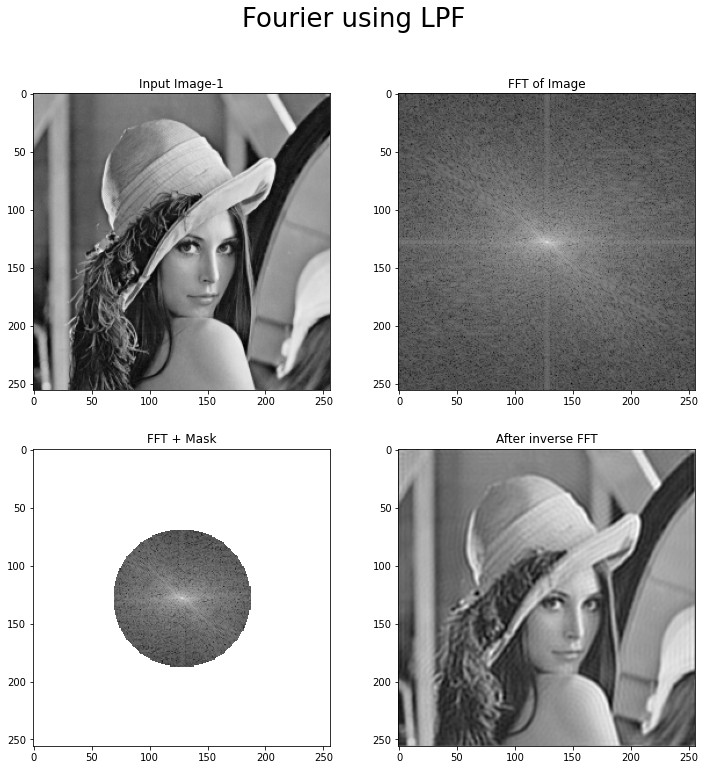

In [16]:
# Printing results.
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(origFotu, cmap = 'gray')
ax1.title.set_text('Input Image-1')
ax1 = fig.add_subplot(2,2,2)
ax1.imshow(magnitude_spectrum, cmap = 'gray')
ax1.title.set_text('FFT of Image')
ax1 = fig.add_subplot(2,2,3)
ax1.imshow(fshift_mask_mag, cmap = 'gray')
ax1.title.set_text('FFT + Mask')
ax1 = fig.add_subplot(2,2,4)
ax1.imshow(img_back, cmap = 'gray')
ax1.title.set_text('After inverse FFT')
fig.suptitle('Fourier using LPF',fontsize=26)
plt.show()


In [17]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()

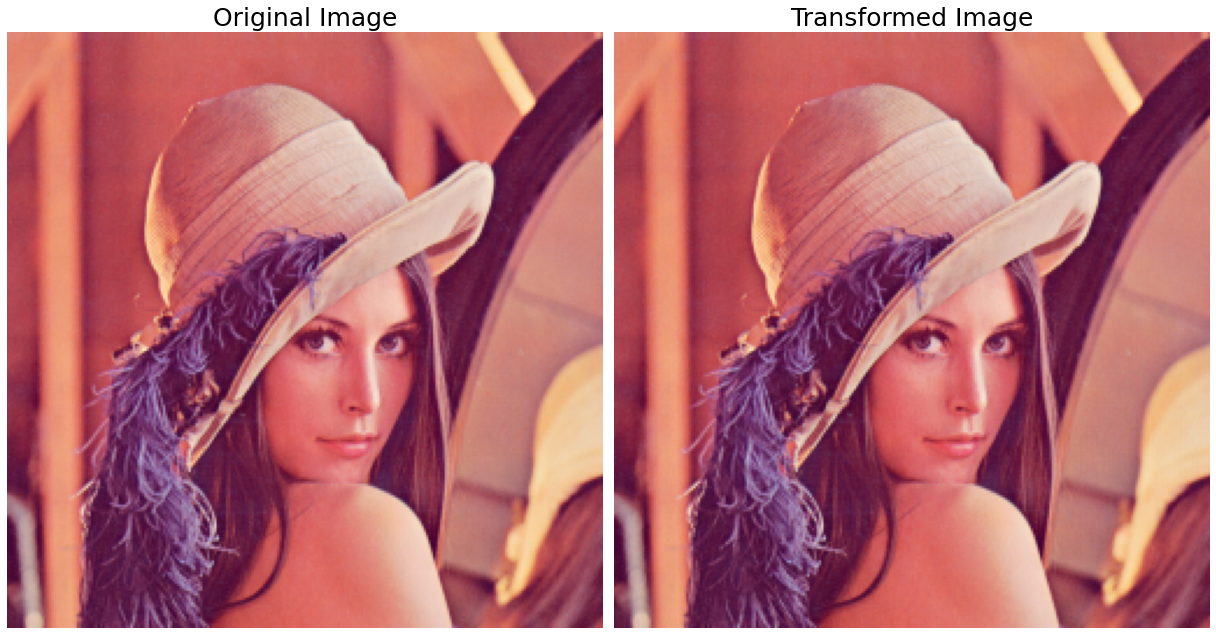

In [18]:
img = imread('color.png')
fourier_transform_rgb(img)

<hr>
Assignment Ends Here 😊